In [181]:
import math
import pandas as pd
import numpy as np
from pylab import plt
import cufflinks
np.set_printoptions(suppress=True)
cufflinks.set_config_file(offline=True)
plt.style.use('seaborn')
pd.set_option('mode.chained_assignment',None)
%config InlineBackend.figure_format='svg'

In [182]:
import yfinance as yf

In [183]:
# Download data
raw= yf.download('^NSEI',start='2001-01-01',end='2022-06-10', index_col=0,parse_dates=True)

[*********************100%***********************]  1 of 1 completed


In [184]:
raw=pd.DataFrame(raw)
raw.info()
raw

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3607 entries, 2007-09-17 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3607 non-null   float64
 1   High       3607 non-null   float64
 2   Low        3607 non-null   float64
 3   Close      3607 non-null   float64
 4   Adj Close  3607 non-null   float64
 5   Volume     3607 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 197.3 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2022-06-03,16761.650391,16793.849609,16567.900391,16584.300781,16584.300781,245500
2022-06-06,16530.699219,16610.949219,16444.550781,16569.550781,16569.550781,233600
2022-06-07,16469.599609,16487.250000,16347.099609,16416.349609,16416.349609,233800


In [185]:
raw1=raw['Adj Close']
print(raw1)
rets= np.log(raw1/raw1.shift(1)).dropna() #log returns

Date
2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2022-06-03    16584.300781
2022-06-06    16569.550781
2022-06-07    16416.349609
2022-06-08    16356.250000
2022-06-09    16478.099609
Name: Adj Close, Length: 3607, dtype: float64


In [186]:
rets.head()

Date
2007-09-18    0.011404
2007-09-19    0.040130
2007-09-20    0.003207
2007-09-21    0.018780
2007-09-24    0.019377
Name: Adj Close, dtype: float64

Regime Detection
... based on unsupervised learning (= only features, no labels).

Typical regimes are:

low volatility, positive trend

low volatility, negative trend

high volatility, positive trend

high volatility, negative trend

In [203]:
from sklearn.cluster import KMeans

In [204]:
model=KMeans(n_clusters=4)# 1.step

In [205]:
f=['mom','vol']

In [206]:
window=20

In [207]:
data=pd.DataFrame(rets)

In [208]:
data['mom']=rets.rolling(window).mean()
data['vol']=rets.rolling(window).std()

In [219]:
data.dropna(inplace=True)

In [220]:
data[f]=(data[f]-data[f].mean())/data[f].std()

In [221]:
data[f].mean().round(6)

mom   -0.0
vol    0.0
dtype: float64

In [222]:
data[f].std().round(6)

mom    1.0
vol    1.0
dtype: float64

<AxesSubplot:xlabel='vol', ylabel='mom'>

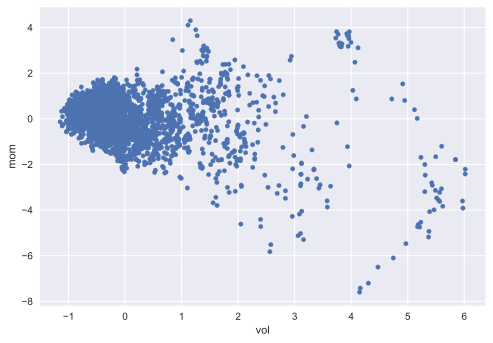

In [223]:
data[f].plot.scatter(x='vol',y='mom')

## Clustering

In [224]:
model.fit(data[f]) # 2. Step

KMeans(n_clusters=4)

In [225]:
r= model.predict(data[f]) # 3. Step

In [226]:
r

array([1, 1, 1, ..., 0, 0, 0])

<AxesSubplot:xlabel='vol', ylabel='mom'>

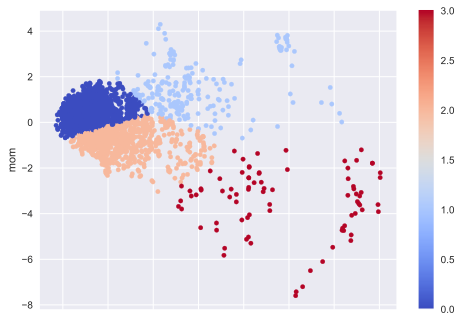

In [227]:
data[f].plot.scatter(x='vol',y='mom',c=r,cmap='coolwarm')

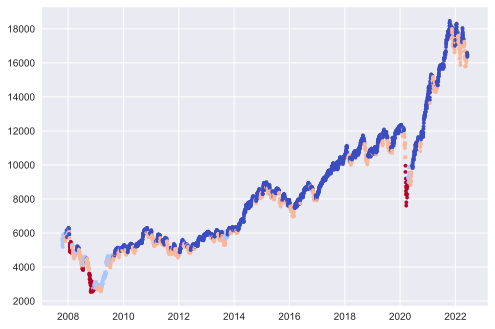

In [228]:
plt.scatter(x=data.index,y=raw1.iloc[window:],marker='.',c=r, cmap='coolwarm')

In [229]:
raw1

Date
2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2022-06-03    16584.300781
2022-06-06    16569.550781
2022-06-07    16416.349609
2022-06-08    16356.250000
2022-06-09    16478.099609
Name: Adj Close, Length: 3607, dtype: float64

In [247]:
#  #Resample
# df7 = df7.resample('M').agg({'Open':'first', 'High':'max', 'Low': 'min', 
#                              'Close':'last', 'Adj Close':'last'})

In [242]:
raww=raw1.resample('W').agg({'Adj Close':'last'})
raww

,Adj Close
Date,
2007-09-23,4837.549805
2007-09-30,5021.350098
2007-10-07,5185.850098
2007-10-14,5428.250000
2007-10-21,5215.299805
...,...
2022-05-15,15782.150391
2022-05-22,16266.150391
2022-05-29,16352.450195
